In [1]:
df = pd.read_parquet('walmart.parquet')
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
0,6,253385,5,24,1,203819,34.785,9.963135,3.499,0.268701,134.613271,2.638256,8.3645,0.126572


In [2]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [3]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
fts = zip(X_train.columns, clf.feature_importances_)
sorted(fts, key=lambda x:x[1], reverse=True)

[('dept', 0.6720515267152651),
 ('size', 0.32794847328473486),
 ('sid', 0.0),
 ('store', 0.0),
 ('type', 0.0),
 ('temperature_stdev', 0.0),
 ('fuel_price_avg', 0.0),
 ('fuel_price_stdev', 0.0),
 ('cpi_avg', 0.0),
 ('cpi_stdev', 0.0),
 ('unemployment_avg', 0.0),
 ('unemployment_stdev', 0.0),
 ('holidayfreq', 0.0)]

In [5]:
from sklearn.metrics import mean_squared_error  

pred = clf.predict(X_test)
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.436203


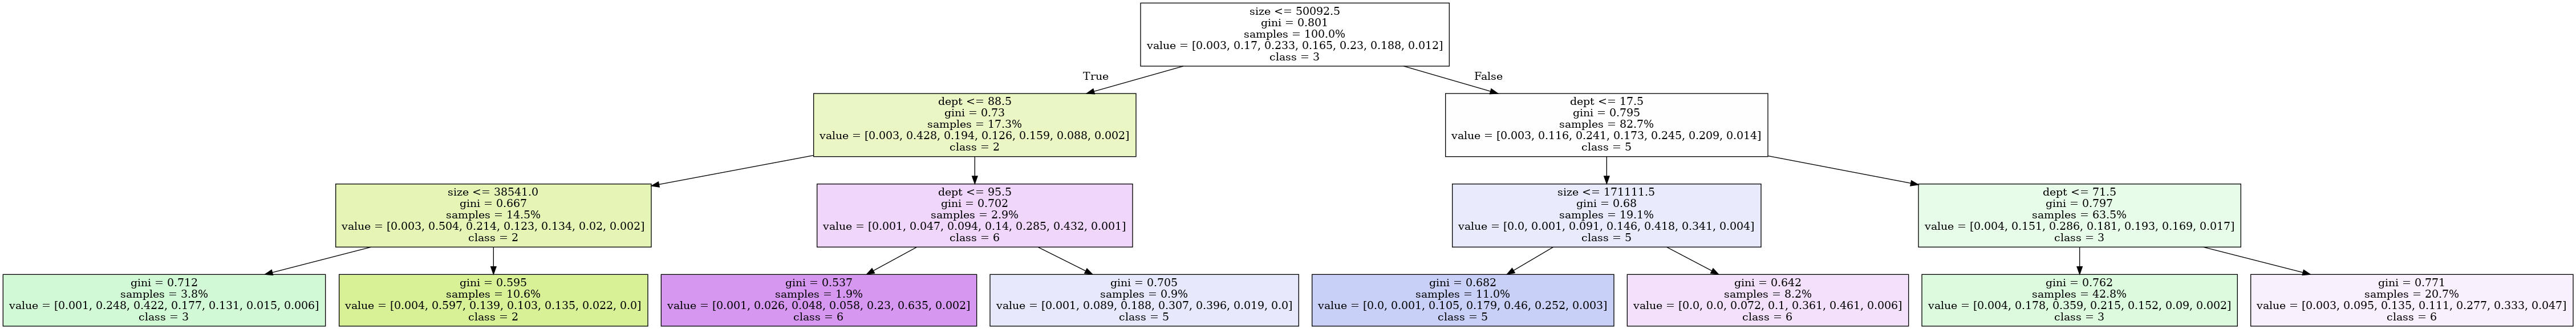

In [10]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5', '6', '7'],
    filled=True,
    proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

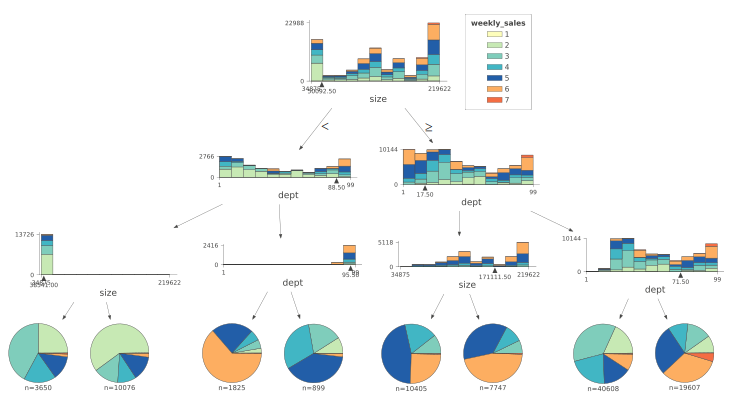

In [11]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    clf,
    X_train, 
    y_train,
    target_name='weekly_sales',
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5', '6', '7'],
)

display(viz)